In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2010-01-01'
end = '2020-12-31'

df = yf.download('AAPL', start=start, end=end)
df.head()

C:\Users\Anushi\AppData\Local\Temp\ipykernel_19904\2536325639.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start=start, end=end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.431897,6.446623,6.382908,6.414465,493729600
2010-01-05,6.443017,6.479383,6.409056,6.449630,601904800
2010-01-06,6.340531,6.468562,6.333919,6.443016,552160000
2010-01-07,6.328808,6.371485,6.282825,6.363972,477131200
2010-01-08,6.370888,6.371489,6.283130,6.320397,447610800


In [3]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-12-23,127.751724,129.185698,127.576126,128.922323,88223700
2020-12-24,128.736938,130.190441,127.888257,128.102868,54930100
2020-12-28,133.341339,133.975409,130.239236,130.707487,124486200
2020-12-29,131.565918,135.389883,131.048903,134.668021,121047300
2020-12-30,130.444107,132.658500,130.131939,132.258541,96452100


In [4]:
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2010-01-04,6.431897,6.446623,6.382908,6.414465,493729600
1,2010-01-05,6.443017,6.479383,6.409056,6.449630,601904800
2,2010-01-06,6.340531,6.468562,6.333919,6.443016,552160000
3,2010-01-07,6.328808,6.371485,6.282825,6.363972,477131200
4,2010-01-08,6.370888,6.371489,6.283130,6.320397,447610800


In [5]:
df = df.drop(['Date'], axis=1)
df.head()

C:\Users\Anushi\AppData\Local\Temp\ipykernel_19904\2218488136.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis=1)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.431897,6.446623,6.382908,6.414465,493729600
1,6.443017,6.479383,6.409056,6.449630,601904800
2,6.340531,6.468562,6.333919,6.443016,552160000
3,6.328808,6.371485,6.282825,6.363972,477131200
4,6.370888,6.371489,6.283130,6.320397,447610800


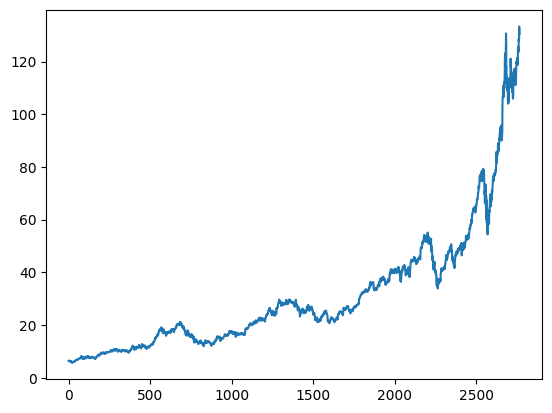

In [6]:
plt.plot(df['Close'])

In [7]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
0,6.431897,6.446623,6.382908,6.414465,493729600
1,6.443017,6.479383,6.409056,6.449630,601904800
2,6.340531,6.468562,6.333919,6.443016,552160000
3,6.328808,6.371485,6.282825,6.363972,477131200
4,6.370888,6.371489,6.283130,6.320397,447610800
...,...,...,...,...,...
2763,127.751724,129.185698,127.576126,128.922323,88223700
2764,128.736938,130.190441,127.888257,128.102868,54930100
2765,133.341339,133.975409,130.239236,130.707487,124486200


In [8]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2763,114.973015
2764,115.194364
2765,115.457894
2766,115.666342


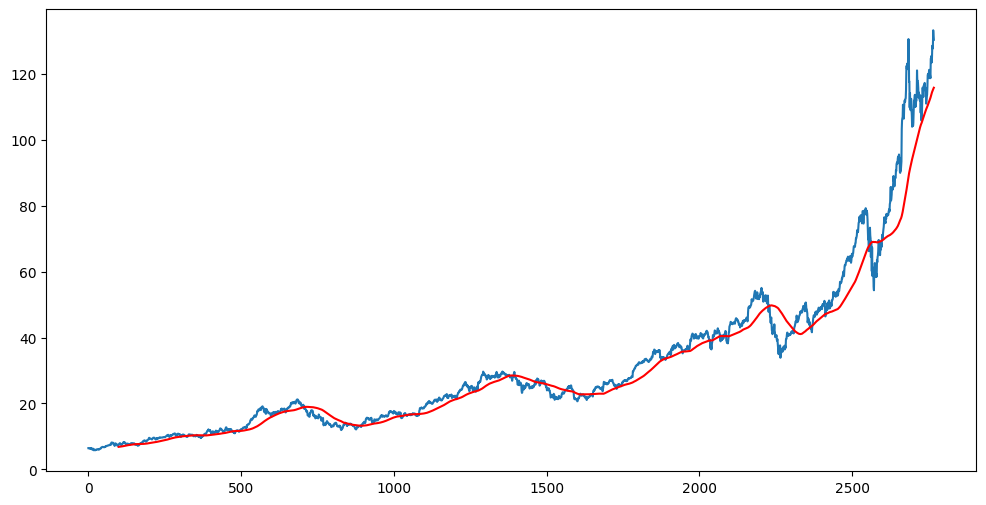

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
2763,96.148515
2764,96.491393
2765,96.821254
2766,97.185572


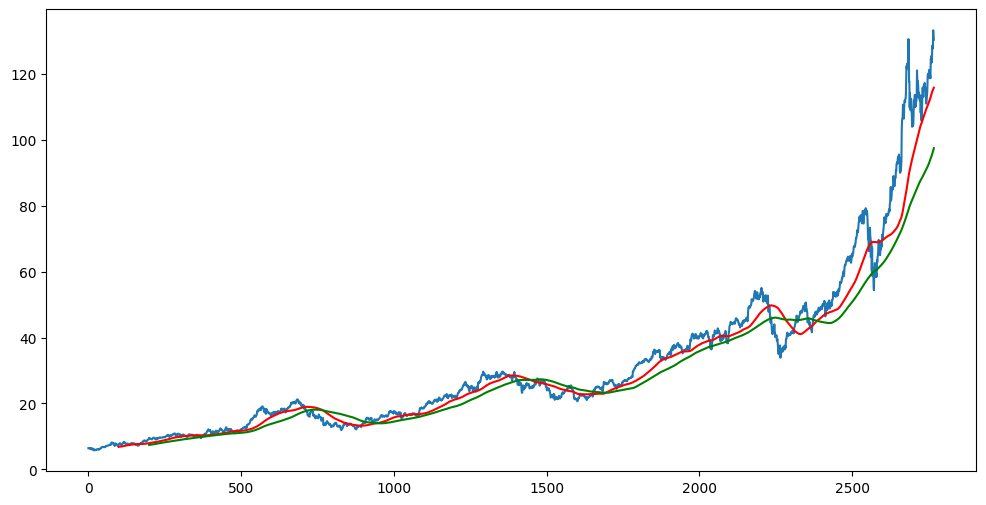

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape


(2768, 5)

In [13]:
#Splitting data into training and testing sets

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(1937, 1)
(831, 1)


In [14]:
data_training.head()

Ticker,AAPL
0,6.431897
1,6.443017
2,6.340531
3,6.328808
4,6.370888


In [15]:
data_testing.head()

Ticker,AAPL
1937,37.333241
1938,37.012871
1939,37.387032
1940,37.104073
1941,37.118103


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02025111],
       [0.02059234],
       [0.01744764],
       ...,
       [0.9611097 ],
       [0.9817027 ],
       [0.97711082]])

In [18]:
data_training_array.shape

(1937, 1)

In [19]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i, 0])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [20]:
# ML model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [21]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

c:\Users\Anushi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 40s 550ms/step - loss: 0.0741
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 13s 223ms/step - loss: 0.0093
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 13s 221ms/step - loss: 0.0065
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 13s 217ms/step - loss: 0.0064
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 200ms/step - loss: 0.0070
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 207ms/step - loss: 0.0052
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 201ms/step - loss: 0.0045
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 206ms/step - loss: 0.0045
Epoch 9/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 12s 202ms/step - loss: 0.0043
Epoch 10/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 13s 227ms/step - loss: 0.0043
Epoch 11/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 185ms/step - loss: 0.0044
Epoch 12/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - loss: 0.0052
Epoch 13/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - loss: 0.0041
Epoch 14/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - loss: 0.0037
Epoch 15/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 11s 

In [25]:
model.save('keras_model.h5')

In [26]:
data_testing.head()

Ticker,AAPL
1937,37.333241
1938,37.012871
1939,37.387032
1940,37.104073
1941,37.118103


In [27]:
past_100_days = data_training.tail(100)

In [30]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [31]:
final_df.head()

Ticker,AAPL
0,33.002670
1,33.320473
2,33.526928
3,33.329754
4,33.355259


In [32]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(931, 1)

In [35]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [36]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


In [37]:
# Making predictions
y_predicted = model.predict(x_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 304ms/step


In [38]:
y_predicted.shape

(831, 1)

In [39]:
y_test

array([0.04315953, 0.03996665, 0.04369563, 0.04087559, 0.04101542,
       0.03481609, 0.02857031, 0.02507438, 0.02195157, 0.02798757,
       0.03052794, 0.02831384, 0.03027147, 0.02954909, 0.03111069,
       0.02878006, 0.03323146, 0.0330216 , 0.03428004, 0.03441998,
       0.03593486, 0.034653  , 0.03696036, 0.04369563, 0.04507063,
       0.04341593, 0.0346065 , 0.03523574, 0.03504918, 0.03721664,
       0.03560847, 0.03793914, 0.05108344, 0.05963648, 0.06504347,
       0.06003267, 0.0628759 , 0.07310709, 0.07718557, 0.0784907 ,
       0.08182334, 0.08098431, 0.07962771, 0.07799061, 0.07183915,
       0.06655313, 0.07127777, 0.06905564, 0.06865812, 0.07604921,
       0.08030607, 0.08032945, 0.07827122, 0.07588554, 0.06748876,
       0.07303201, 0.0711609 , 0.06823722, 0.06786305, 0.0663895 ,
       0.06711447, 0.06723141, 0.07494991, 0.07268121, 0.07401443,
       0.07389734, 0.07799061, 0.08372098, 0.0793236 , 0.07887936,
       0.08042298, 0.08042298, 0.07003811, 0.07010841, 0.07123

In [40]:
y_predicted

array([[0.09263946],
       [0.09281947],
       [0.09294264],
       [0.09300749],
       [0.0930236 ],
       [0.09299655],
       [0.09293193],
       [0.09282286],
       [0.09265757],
       [0.09242703],
       [0.09212932],
       [0.09178156],
       [0.09140635],
       [0.09102102],
       [0.09064484],
       [0.09029043],
       [0.0899694 ],
       [0.08968295],
       [0.08943979],
       [0.08924186],
       [0.08909008],
       [0.08898278],
       [0.08891769],
       [0.08888699],
       [0.08888742],
       [0.08892915],
       [0.08901854],
       [0.08915232],
       [0.08930361],
       [0.08945259],
       [0.08958323],
       [0.0896903 ],
       [0.08976917],
       [0.08982675],
       [0.08990058],
       [0.09003617],
       [0.09027337],
       [0.09062137],
       [0.09108661],
       [0.09168541],
       [0.09242573],
       [0.09330478],
       [0.09431203],
       [0.09542073],
       [0.09659231],
       [0.0977758 ],
       [0.09890939],
       [0.099

In [41]:
scaler.scale_

array([0.00996625])

In [42]:
scale_factor = 1 / 0.00996625
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

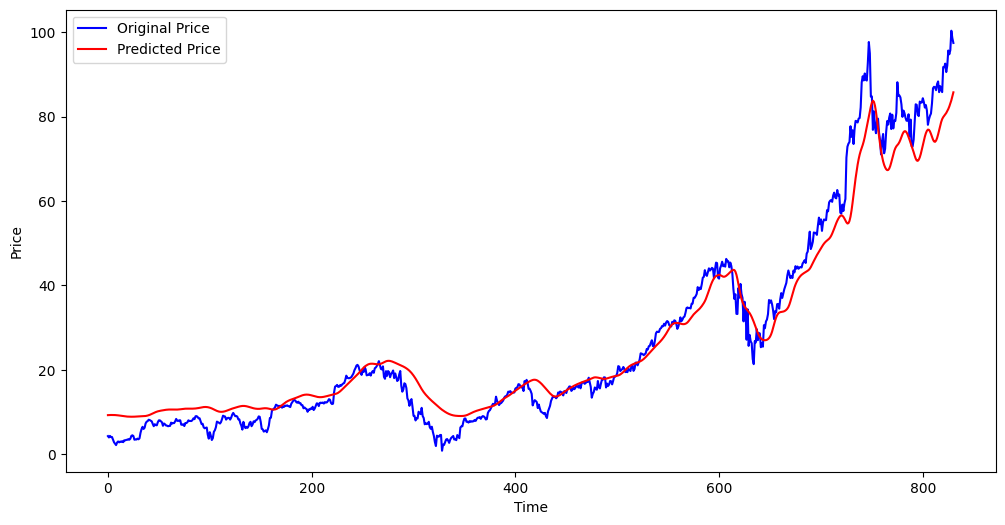

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()